In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
covid_germany = pd.read_excel('covid_de.xlsx')
covid_germany['date'] = pd.to_datetime(covid_germany['date'])
covid_germany['date'] = covid_germany['date'].dt.strftime('%d-%m-%Y')
covid_germany.dtypes


state        object
county       object
age_group    object
gender       object
date         object
cases         int64
deaths        int64
recovered     int64
dtype: object

In [3]:
covid_germany.head()

,state,county,age_group,gender,date,cases,deaths,recovered
0,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,27-03-2020,1,0,0
1,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,28-03-2020,1,0,0
2,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,03-04-2020,1,0,0
3,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,M,09-04-2020,1,0,0
4,Baden-Wuerttemberg,LK Alb-Donau-Kreis,05-14,F,17-03-2020,1,0,0


In [4]:
covid_germany_state = covid_germany.groupby(by='state').sum()
covid_germany_county = covid_germany.groupby(by='county').sum()
covid_germany_age = covid_germany.groupby(by='age_group').sum()
covid_germany_gender = covid_germany.groupby(by='gender').sum()

In [5]:
covid_germany_state.reset_index(inplace=True)
covid_germany_county.reset_index(inplace = True)
covid_germany_age.reset_index(inplace =True)
covid_germany_gender.reset_index(inplace = True)

In [6]:
covid_germany_age_melt = covid_germany_age.melt('age_group', var_name='cols',  value_name='vals')

 # Germany COVID stats by age groups

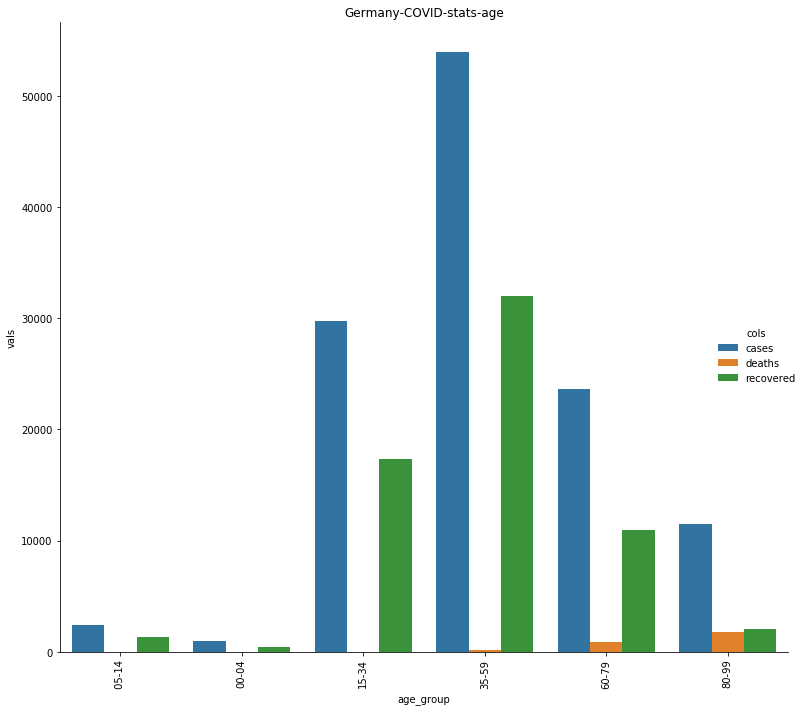

In [7]:
g = sns.catplot(x="age_group", y="vals", hue='cols', data=covid_germany_age_melt,height =10,kind='bar')
plt.xticks(rotation=90)
plt.title('Germany-COVID-stats-age')
plt.tight_layout()
plt.savefig('images/Germany-COVID-stats-age.png')

In [8]:
covid_germany_gender_melt = covid_germany_gender.melt('gender', var_name='cols',  value_name='vals')

# Germany COVID stats by gender

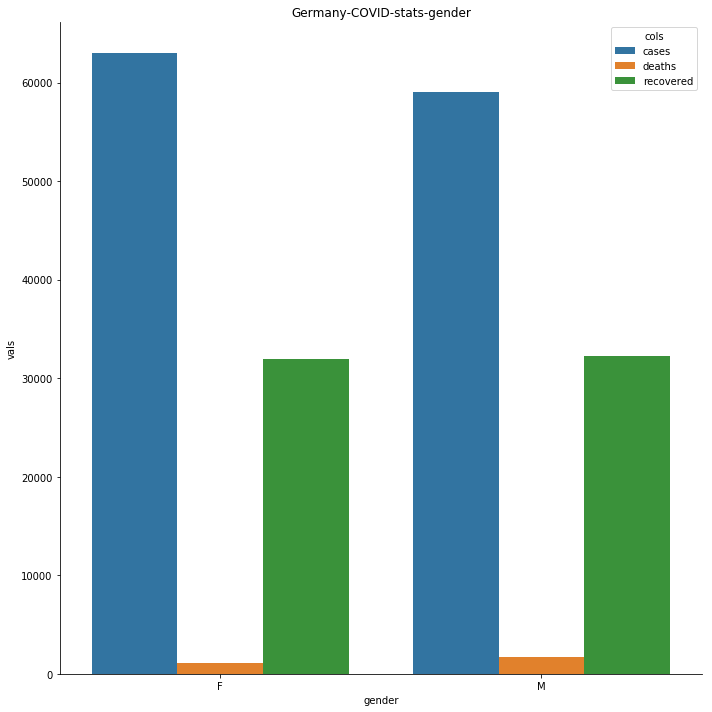

In [9]:
g = sns.catplot(x="gender", y="vals", hue='cols', data=covid_germany_gender_melt,height =10,kind='bar',legend_out=False)
plt.title('Germany-COVID-stats-gender')
plt.tight_layout()
plt.savefig('images/Germany-COVID-stats-gender.png')

# Germany COVID stats by states

In [10]:
covid_germany_state_melt = covid_germany_state.melt('state', var_name='cols',  value_name='vals')

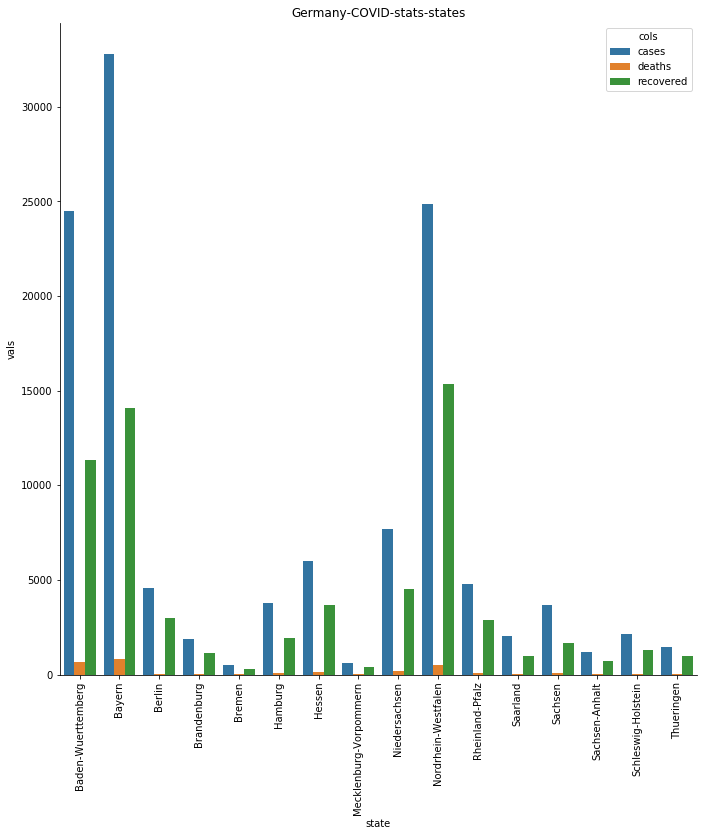

In [11]:
g = sns.catplot(x="state", y="vals", hue='cols', data=covid_germany_state_melt,height =10,kind='bar',legend_out=False,aspect=1)
plt.title('Germany-COVID-stats-states')
plt.tight_layout()
plt.xticks(rotation=90)
plt.savefig('images/Germany-COVID-stats-states.png')

In [16]:
covid_germany_state_sorted_cases = covid_germany_state.sort_values(by='cases',ascending = False)
covid_germany_state_sorted_deaths = covid_germany_state.sort_values(by='deaths',ascending = False)
covid_germany_state_sorted_recovered = covid_germany_state.sort_values(by='recovered',ascending = False)

# German States by confirmed cases

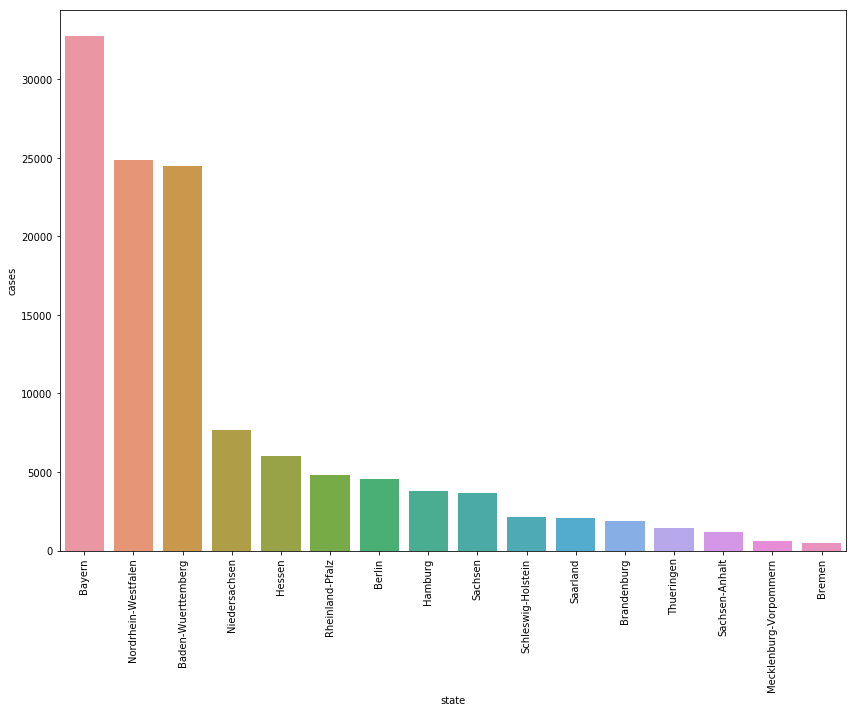

In [18]:
plt.figure(figsize=(12,10))
sns.barplot(x='state',y='cases',data=covid_germany_state_sorted_cases)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('images/germanstatesbycases.png')

# German States by deaths

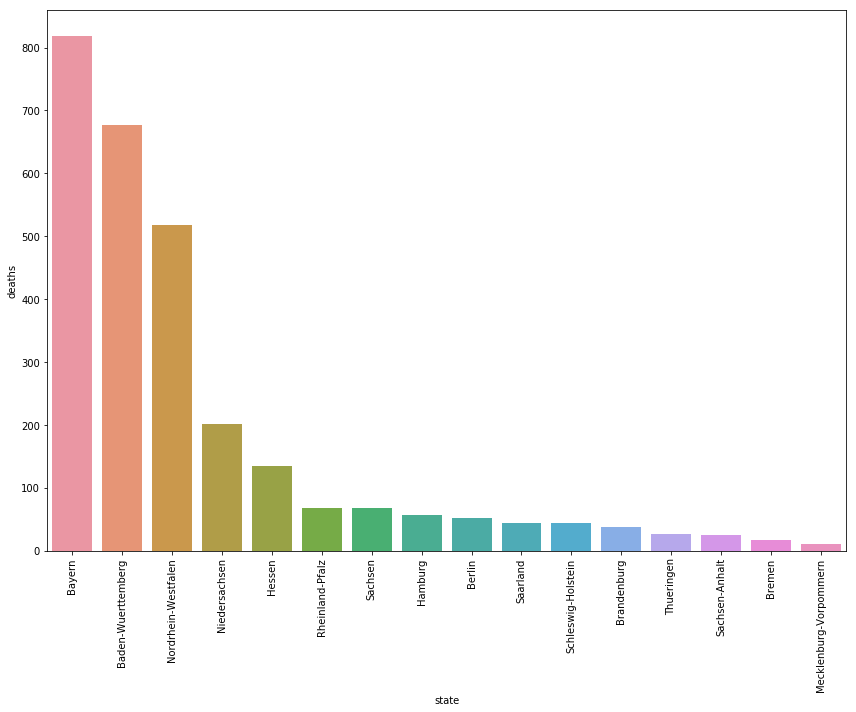

In [19]:
plt.figure(figsize=(12,10))
sns.barplot(x='state',y='deaths',data=covid_germany_state_sorted_deaths)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('images/germanstatesbydeaths.png')

# German States by recovered cases

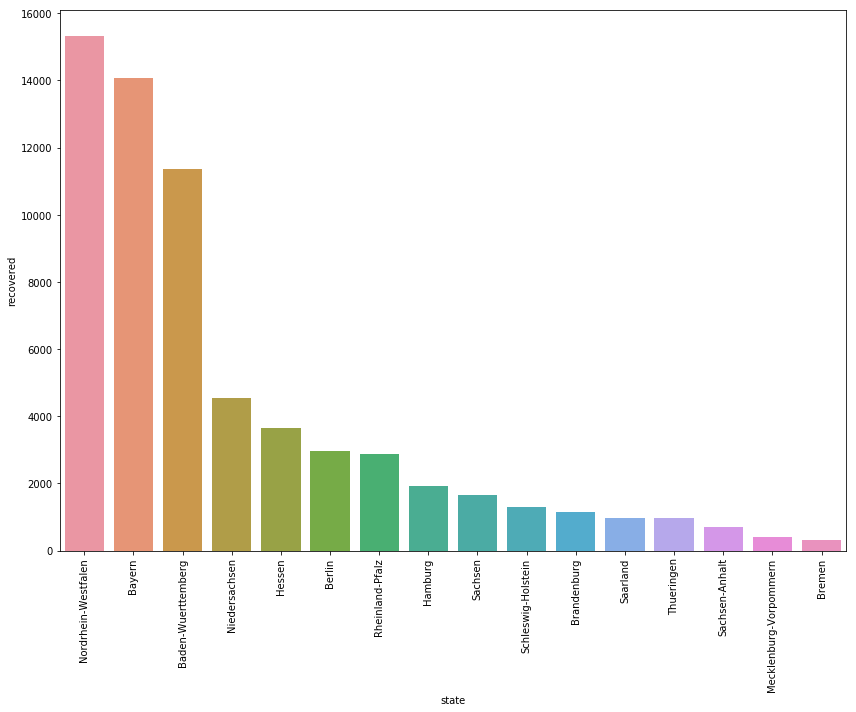

In [21]:
plt.figure(figsize=(12,10))
sns.barplot(x='state',y='recovered',data=covid_germany_state_sorted_recovered)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('images/germanstatesbyrecovered.png')

In [26]:
covid_germany_age_sorted_cases = covid_germany_age.sort_values(by='cases',ascending = False)
covid_germany_age_sorted_deaths = covid_germany_age.sort_values(by='deaths', ascending = False)
covid_germany_age_sorted_recovered = covid_germany_age.sort_values(by='recovered', ascending = False)

,age_group,cases,deaths,recovered
3,35-59,53917,129,31989
2,15-34,29781,5,17332
4,60-79,23679,921,10966
5,80-99,11519,1738,2079
0,05-14,2401,0,1319
1,00-04,964,1,465


# Age Groups by Confirmed cases

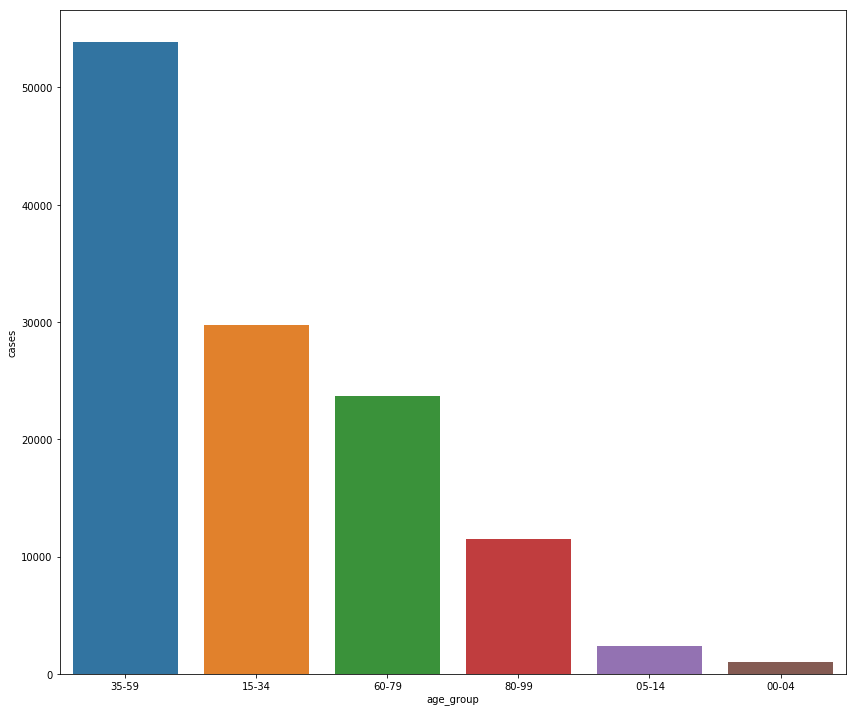

In [31]:
plt.figure(figsize=(12,10))
sns.barplot(x='age_group',y='cases',data=covid_germany_age_sorted_cases)
plt.tight_layout()
plt.savefig('images/agegroupbycases.png')

# Age Groups by deaths

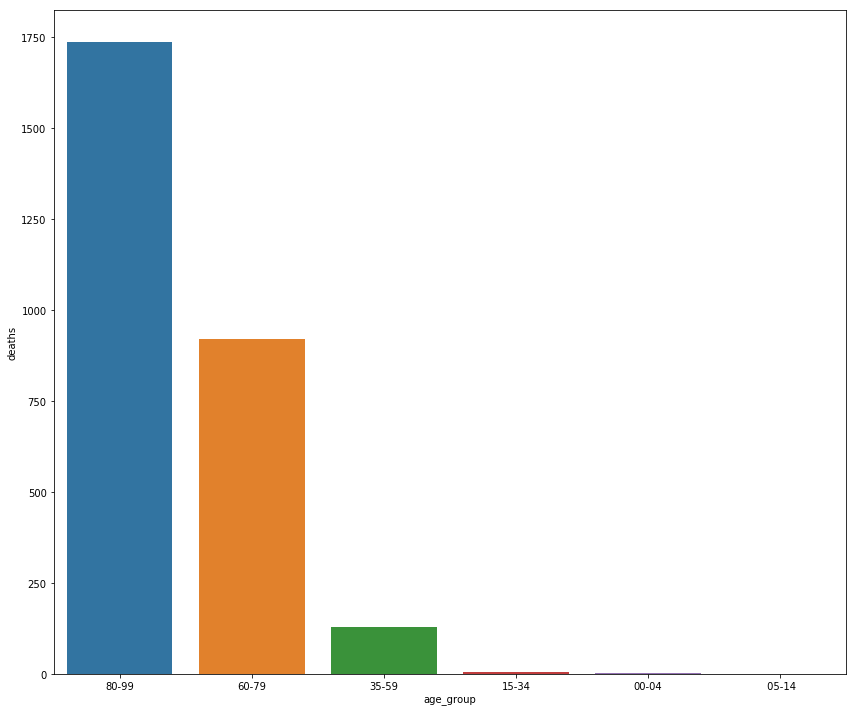

In [32]:
plt.figure(figsize=(12,10))
sns.barplot(x='age_group',y='deaths',data=covid_germany_age_sorted_deaths)
plt.tight_layout()
plt.savefig('images/agegroupbydeaths.png')

# Age Groups by recovered cases

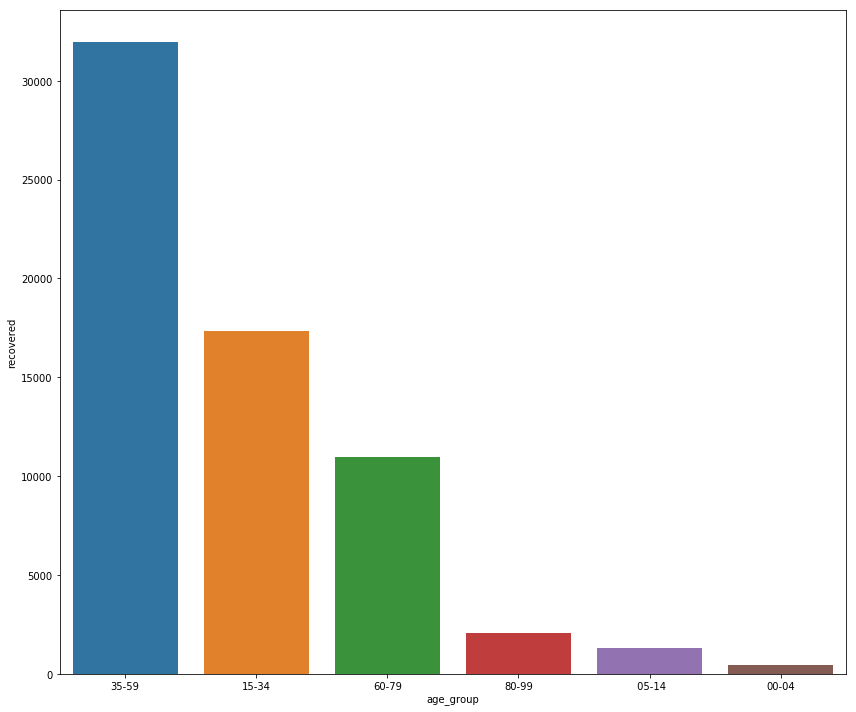

In [33]:
plt.figure(figsize=(12,10))
sns.barplot(x='age_group',y='recovered',data=covid_germany_age_sorted_recovered)
plt.tight_layout()
plt.savefig('images/agegroupbyrecovered.png')

In [37]:
covid_germany_age['fatality rate'] = (covid_germany_age['deaths']/covid_germany_age['cases'])*100
covid_germany_age['recovery rate'] = (covid_germany_age['recovered']/covid_germany_age['cases'])*100
covid_germany_age_rates = covid_germany_age.drop(['cases','deaths','recovered'], axis = 1 )
covid_germany_age_rates

,age_group,fatality rate,recovery rate
0,05-14,0.000000,54.935444
1,00-04,0.103734,48.236515
2,15-34,0.016789,58.198180
3,35-59,0.239257,59.330081
4,60-79,3.889522,46.311077
5,80-99,15.088115,18.048442


# Fatality & Recovery rate based on age groups

In [38]:
covid_germany_age_rates_melt = covid_germany_age_rates.melt('age_group', var_name='cols',  value_name='vals')

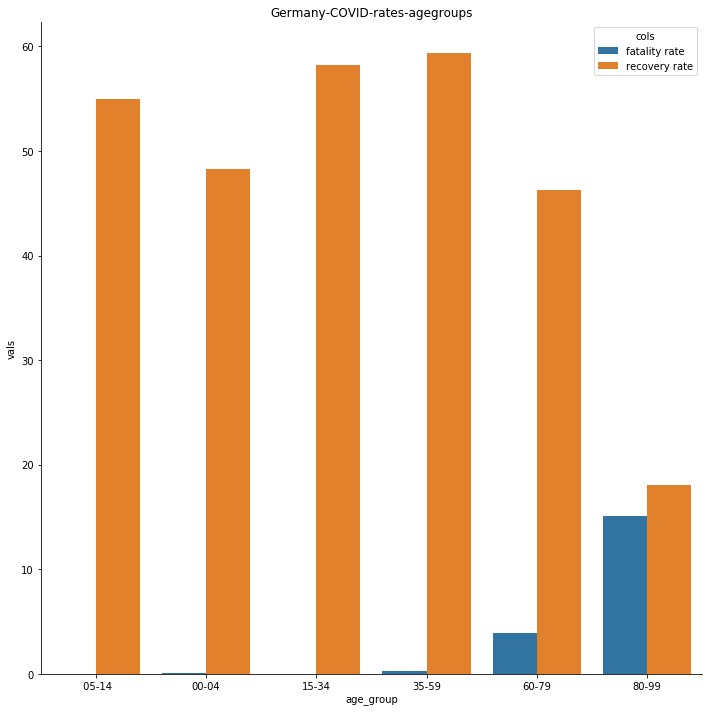

In [40]:
g = sns.catplot(x="age_group", y="vals", hue='cols', data=covid_germany_age_rates_melt,height =10,kind='bar',legend_out=False,aspect=1)
plt.title('Germany-COVID-rates-agegroups')
plt.tight_layout()
plt.savefig('images/Germany-COVID-rates-agegroups.png')

In [42]:
covid_germany_state
covid_germany_state['fatality rate'] = (covid_germany_state['deaths']/covid_germany_state['cases'])*100
covid_germany_state['recovery rate'] = (covid_germany_state['recovered']/covid_germany_state['cases'])*100
covid_germany_state_rates = covid_germany_state.drop(['cases','deaths','recovered'], axis = 1 )
covid_germany_state_rates

,state,fatality rate,recovery rate
0,Baden-Wuerttemberg,2.765862,46.427258
1,Bayern,2.498170,42.938629
2,Berlin,1.115974,65.076586
3,Brandenburg,2.021277,61.382979
4,Bremen,3.534304,64.449064
5,Hamburg,1.488570,50.770867
6,Hessen,2.226653,60.651379
7,Mecklenburg-Vorpommern,1.788618,66.991870
8,Niedersachsen,2.608019,58.920462
9,Nordrhein-Westfalen,2.081910,61.625337


# Fatality & Recovery rate based on states

In [44]:
covid_germany_state_rates_melt = covid_germany_state_rates.melt('state', var_name='cols',  value_name='vals')

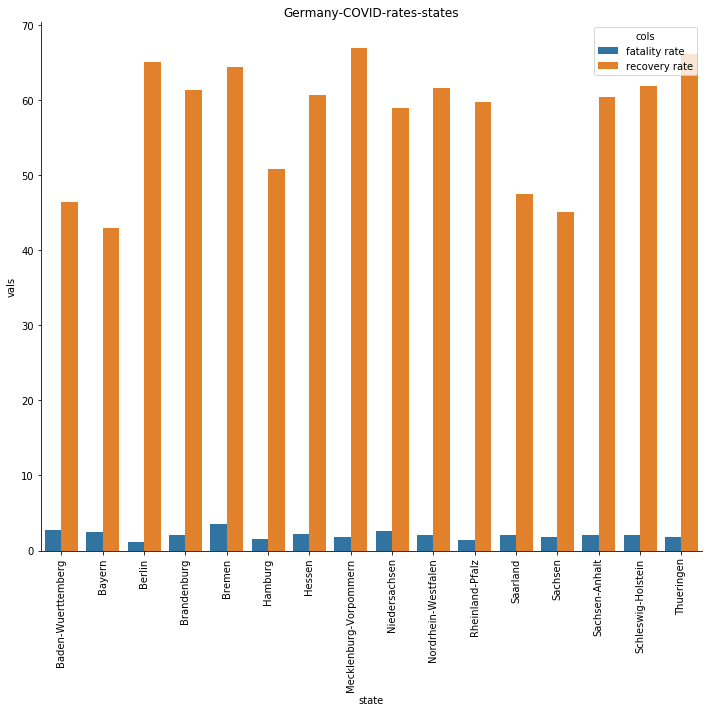

In [50]:
g = sns.catplot(x="state", y="vals", hue='cols', data=covid_germany_state_rates_melt,height =10,kind='bar',legend_out=False,aspect=1)
plt.title('Germany-COVID-rates-states')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('images/Germany-COVID-rates-states.png')

In [58]:
covid_germany_gender['fatality rate'] = (covid_germany_gender['deaths']/covid_germany_gender['cases'])*100
covid_germany_gender['recovery rate'] = (covid_germany_gender['recovered']/covid_germany_gender['cases'])*100
covid_germany_gender_rates = covid_germany_gender.drop(['cases','deaths','recovered'], axis = 1 )


# Fatality & Recovery rate based on gender

In [57]:
covid_germany_gender_rates_melt = covid_germany_gender_rates.melt('gender', var_name='cols',  value_name='vals')

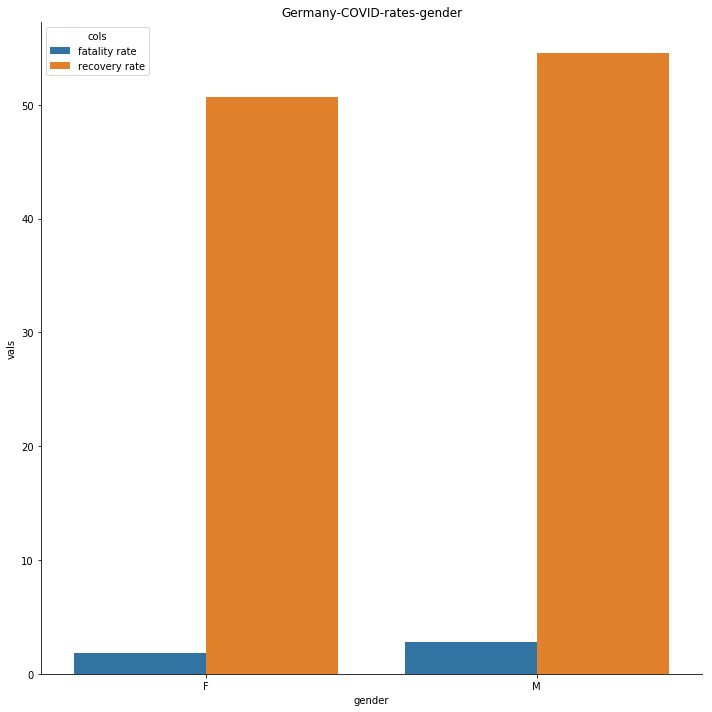

In [56]:
g = sns.catplot(x="gender", y="vals", hue='cols', data=covid_germany_gender_rates_melt,height =10,kind='bar',legend_out=False,aspect=1)
plt.title('Germany-COVID-rates-gender')
plt.tight_layout()
plt.savefig('images/Germany-COVID-rates-gender.png')

KeyError: 'date'

In [109]:
covid_germany_date

,date,cases,deaths,recovered
0,01-03-2020,36,0,36
1,01-04-2020,6209,216,2623
2,02-02-2020,1,0,0
3,02-03-2020,42,0,40
4,02-04-2020,6517,182,2445
5,03-02-2020,1,0,1
6,03-03-2020,78,0,78
7,03-04-2020,6234,145,1881
8,04-02-2020,5,0,4
9,04-03-2020,149,2,147
